# TileDB OME-TIFF Conversion

In [1]:
import os

import cv2
import matplotlib.pylab as pylab
import numpy as np
import tiledb

from tiledbimg.converters.ome_tiff import OMETiffConverter
from tiledbimg.openslide import TileDBOpenSlide

## Convert OME-TIFF to TileDB Slide

In [2]:
src = "../tests/data/CMU-1-Small-Region.ome.tiff"
dest = src + ".tiledb"
if not os.path.exists(dest):
    OMETiffConverter().to_tiledb(src, dest, level_min=0)

## Slide Group Contents

In [3]:
a = tiledb.open(os.path.join(dest, "l_0.tdb"))
a.schema

ArraySchema(
  domain=Domain(*[
    Dim(name='X', domain=(0, 2219), tile=1024, dtype='uint64'),
    Dim(name='Y', domain=(0, 2966), tile=1024, dtype='uint64'),
    Dim(name='C', domain=(0, 2), tile=3, dtype='uint64'),
  ]),
  attrs=[
    Attr(name='', dtype='uint8', var=False, nullable=False, filters=FilterList([ZstdFilter(level=0), ])),
  ],
  cell_order='row-major',
  tile_order='row-major',
  capacity=10000,
  sparse=False,
)

## TileDB Slide Information

In [4]:
slide = TileDBOpenSlide.from_group_uri(dest)
print("level_count:", slide.level_count)
print("dimensions:", slide.dimensions)
print("level_dimensions:", slide.level_dimensions)
print("level_downsamples:", slide.level_downsamples)
print("level_info:", slide.level_info)

level_count: 3
dimensions: (2220, 2967)
level_dimensions: ((2220, 2967), (387, 463), (1280, 431))
level_downsamples: (1.0, 6.0723207259698295, 4.30918285962877)
level_info: (LevelInfo(level=0, dimensions=(2220, 2967)), LevelInfo(level=1, dimensions=(387, 463)), LevelInfo(level=2, dimensions=(1280, 431)))


## Reading Slide Data

In [5]:
img3d = slide.read_region((0, 0), 0, slide.dimensions)
norm_img3d = cv2.normalize(src=img3d, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

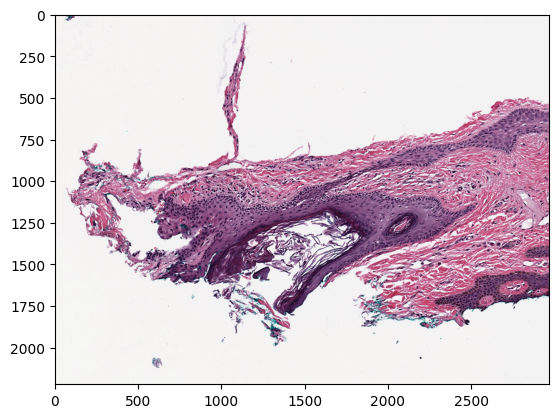

In [6]:
pylab.imshow(norm_img3d)